### Análise de Fraude - 01/2020
### MARCIO DE LIMA

### DADOS Fornecidos - desafio_fraude.csv

### ARQUIVO CSV ANONIMIZADO com 31 colunas.

### Estrutura do arquivo  

Ocorrencia    float64

PP1           float64

PP2           float64

PP3           float64

PP4           float64

PP5           float64

PP6           float64

PP7           float64

PP8           float64

PP9           float64

PP10          float64

PP11          float64

PP12          float64

PP13          float64

PP14          float64

PP15          float64

PP16          float64

PP17          float64

PP18          float64

PP19          float64

PP20          float64

PP21          float64

PP22          float64

PP23          float64

PP24          float64

PP25          float64

PP26          float64

PP27          float64

PP28          float64

Sacado        float64

Fraude          int64 => VARIAVEL TARGET (0 => OK, 1 => Fraude)


Comentário: Não foi fornecido um dicionário de dados nem os nomes das colunas perante ao negócio, provavelmente devido a anonimização, mas isso prejudica e dificulta a análise estatística. 

Comentário: Não foi fornecido no arquivo algum campo de data, dados de sexo, faixa de idade, localidade, faixa de renda, faixa de score Serasa, etc.; que seriam interessantes para a análise e para melhorar a deteção de fraude, na minha opinião. 

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [120]:
# Importando o arquivo 
df = pd.read_csv('desafio_fraude.csv')

In [121]:
#df.dtypes
df.head(5)

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
0,-44299.0,-1.239996,0.985194,-1.005080,0.251323,0.872854,-1.677811,1.451311,-0.478908,-0.009459,...,0.387768,0.286200,0.128686,1.280392,-0.301116,-0.673309,-0.069611,-0.009597,-28.38,0
1,-44300.0,-0.472690,1.869177,-0.277741,1.122846,1.526166,0.262325,0.242333,-0.006108,-1.659659,...,-0.387745,-0.434629,0.512801,-0.110994,-0.350975,-0.073826,0.035071,-0.080140,-407.00,0
2,-44301.0,0.277314,3.455314,-0.722444,-0.428284,2.512025,-0.540760,0.345111,-0.013655,-0.233508,...,-0.630255,-0.388096,0.697177,-0.523084,-0.069830,0.196482,0.052145,-0.166683,-800.00,0
3,-44301.0,-1.061770,-0.105481,-0.226711,-0.929524,-0.100625,-0.300173,0.029912,-0.205934,0.233190,...,-0.147422,-0.426827,0.070413,0.283090,-0.487739,0.288220,-0.035644,-0.007305,-31.28,0
4,-44302.0,4.622715,2.621667,0.872085,0.374010,1.456021,-1.531875,-0.162837,-1.331547,-0.340639,...,0.221196,0.804017,1.309062,1.505088,0.260178,-0.861611,-0.130562,1.023781,-522.16,0


## Análise Exploratória

In [12]:
# Mostrando os dados
df.shape

(150000, 31)

In [13]:
# Mostrando as estruturas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
Ocorrencia    150000 non-null float64
PP1           150000 non-null float64
PP2           150000 non-null float64
PP3           150000 non-null float64
PP4           150000 non-null float64
PP5           150000 non-null float64
PP6           150000 non-null float64
PP7           150000 non-null float64
PP8           150000 non-null float64
PP9           150000 non-null float64
PP10          150000 non-null float64
PP11          150000 non-null float64
PP12          150000 non-null float64
PP13          150000 non-null float64
PP14          150000 non-null float64
PP15          150000 non-null float64
PP16          150000 non-null float64
PP17          150000 non-null float64
PP18          150000 non-null float64
PP19          150000 non-null float64
PP20          150000 non-null float64
PP21          150000 non-null float64
PP22          150000 non-null float64
PP23          1

In [38]:
# Dados Estatisticos - Analise descritiva das colunas Numéricos
# Arquivo com 31 colunas, todas numéricas, total de Registros: 150.000 linhas
# Variavel Target possue o 0 e 1, mas só olhando a média já vemos que temos poucos registros de Fraude
# o que é característico em bases de análise de fraude (Fraud Analytics). Veremos mais abaixo isso. 
# Possíveis outlier na coluna Sacado. 
# Desvio padrão quase o mesmo para todas as colunas. 

df.describe()

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,-84550.214580,0.058999,-0.000790,-0.192183,-0.037416,0.061588,-0.025715,0.026695,-0.004257,0.028148,...,0.009957,0.027398,0.007275,-0.002739,-0.035211,-0.001127,-0.000535,-0.001028,-88.602261,0.001580
std,27710.748503,1.894453,1.623712,1.406053,1.397615,1.341265,1.310820,1.194923,1.205874,1.106154,...,0.739429,0.707714,0.622620,0.606964,0.506130,0.483787,0.397662,0.307684,247.302373,0.039718
min,-133236.000000,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,...,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-115169.000000,-1.243456,-0.802149,-1.138473,-0.812624,-0.526469,-0.424574,-0.527260,-0.340863,-0.565387,...,-0.165038,-0.466423,-0.128298,-0.431560,-0.369398,-0.247606,-0.090965,-0.078861,-77.662500,0.000000
50%,-77502.500000,0.042647,-0.082193,-0.359076,-0.039549,0.124219,0.245177,-0.013129,-0.037083,0.095975,...,0.033794,0.014600,0.020008,-0.049357,-0.071030,0.057265,-0.004792,-0.016759,-22.040000,0.000000
75%,-61713.750000,0.952018,0.588600,0.555060,0.816575,0.751890,0.734024,0.564334,0.193112,0.678488,...,0.225362,0.540801,0.164620,0.348762,0.274183,0.331361,0.068544,0.048427,-5.410000,0.000000
max,-44299.000000,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,...,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


In [122]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [123]:
#Checando valores Null nos dados
df.isnull().any()[lambda x: x]

Series([], dtype: bool)

Comentário: Dados sem valores NA e sem valores NULL

In [124]:
# Distribuição da varíavel TARGET 
df.groupby('Fraude').size()

Fraude
0    149763
1       237
dtype: int64

Comentário: Conforme números acima, temos somente 0,15% de registros de Fraude. Desta forma, os dados estão totalmente desbalanceados, isso é um problema, pois o modelo de ML tenderá a ter alta acurácia somente do campo Não Fraude.  

In [125]:
# Verificando dados duplicados no DataSet

duplicateRowsDF = df[df.duplicated(keep='last')]
print("Linhas duplicadas: ")
print(duplicateRowsDF)

duplicateRowsDF_col = df[df.duplicated(['Ocorrencia'])]
print("Linhas duplicadas por Ocorrencia somente: ")
print(duplicateRowsDF_col)

duplicateRowsDF_col_target = df[df.duplicated(['Ocorrencia', 'Fraude'])]
print("Linhas duplicadas por Ocorrencia e Fraude somente: ")
print(duplicateRowsDF_col_target)



Linhas duplicadas: 
        Ocorrencia       PP1       PP2       PP3       PP4       PP5  \
828       -44667.0  2.447845 -1.979710 -0.900147 -1.594519  1.818622   
830       -44667.0  2.451616 -1.973770 -0.902784 -1.595978  1.805211   
918       -44706.0  1.582883 -1.531487 -0.667022 -0.158470  0.985789   
920       -44706.0  1.567447 -1.555799 -0.656228 -0.152497  1.040683   
927       -44708.0  4.678386 -3.451893  1.946664 -0.277297  3.050028   
929       -44708.0  4.686662 -3.284455  1.260573 -0.283085  3.713478   
1749      -45102.0  0.940684 -0.903703 -0.978734  0.437718 -0.876943   
1751      -45102.0  0.960468 -0.872543 -0.992569  0.430062 -0.947298   
2020      -45242.0  2.843254 -2.163409  0.155632  1.535508  0.527553   
2022      -45242.0  2.848328 -2.155417  0.152084  1.533544  0.509508   
2481      -45473.0  1.874503 -1.947798 -0.098195  1.482192  0.665688   
2483      -45473.0  1.224211 -2.971995  0.356549  1.733830  2.978190   
3426      -45971.0 -1.289497 -0.107352 -0.19

Comentário: Não temos linhas duplicadas no dataset, mas temos registros da mesma ocorrência. Verificado que isso não é um problema, pois a mesma ocorrência não possui status de Fraude Sim ou Não. Desta forma, decidi não efetuar a eliminação dessas linhas. 

## Gráficos

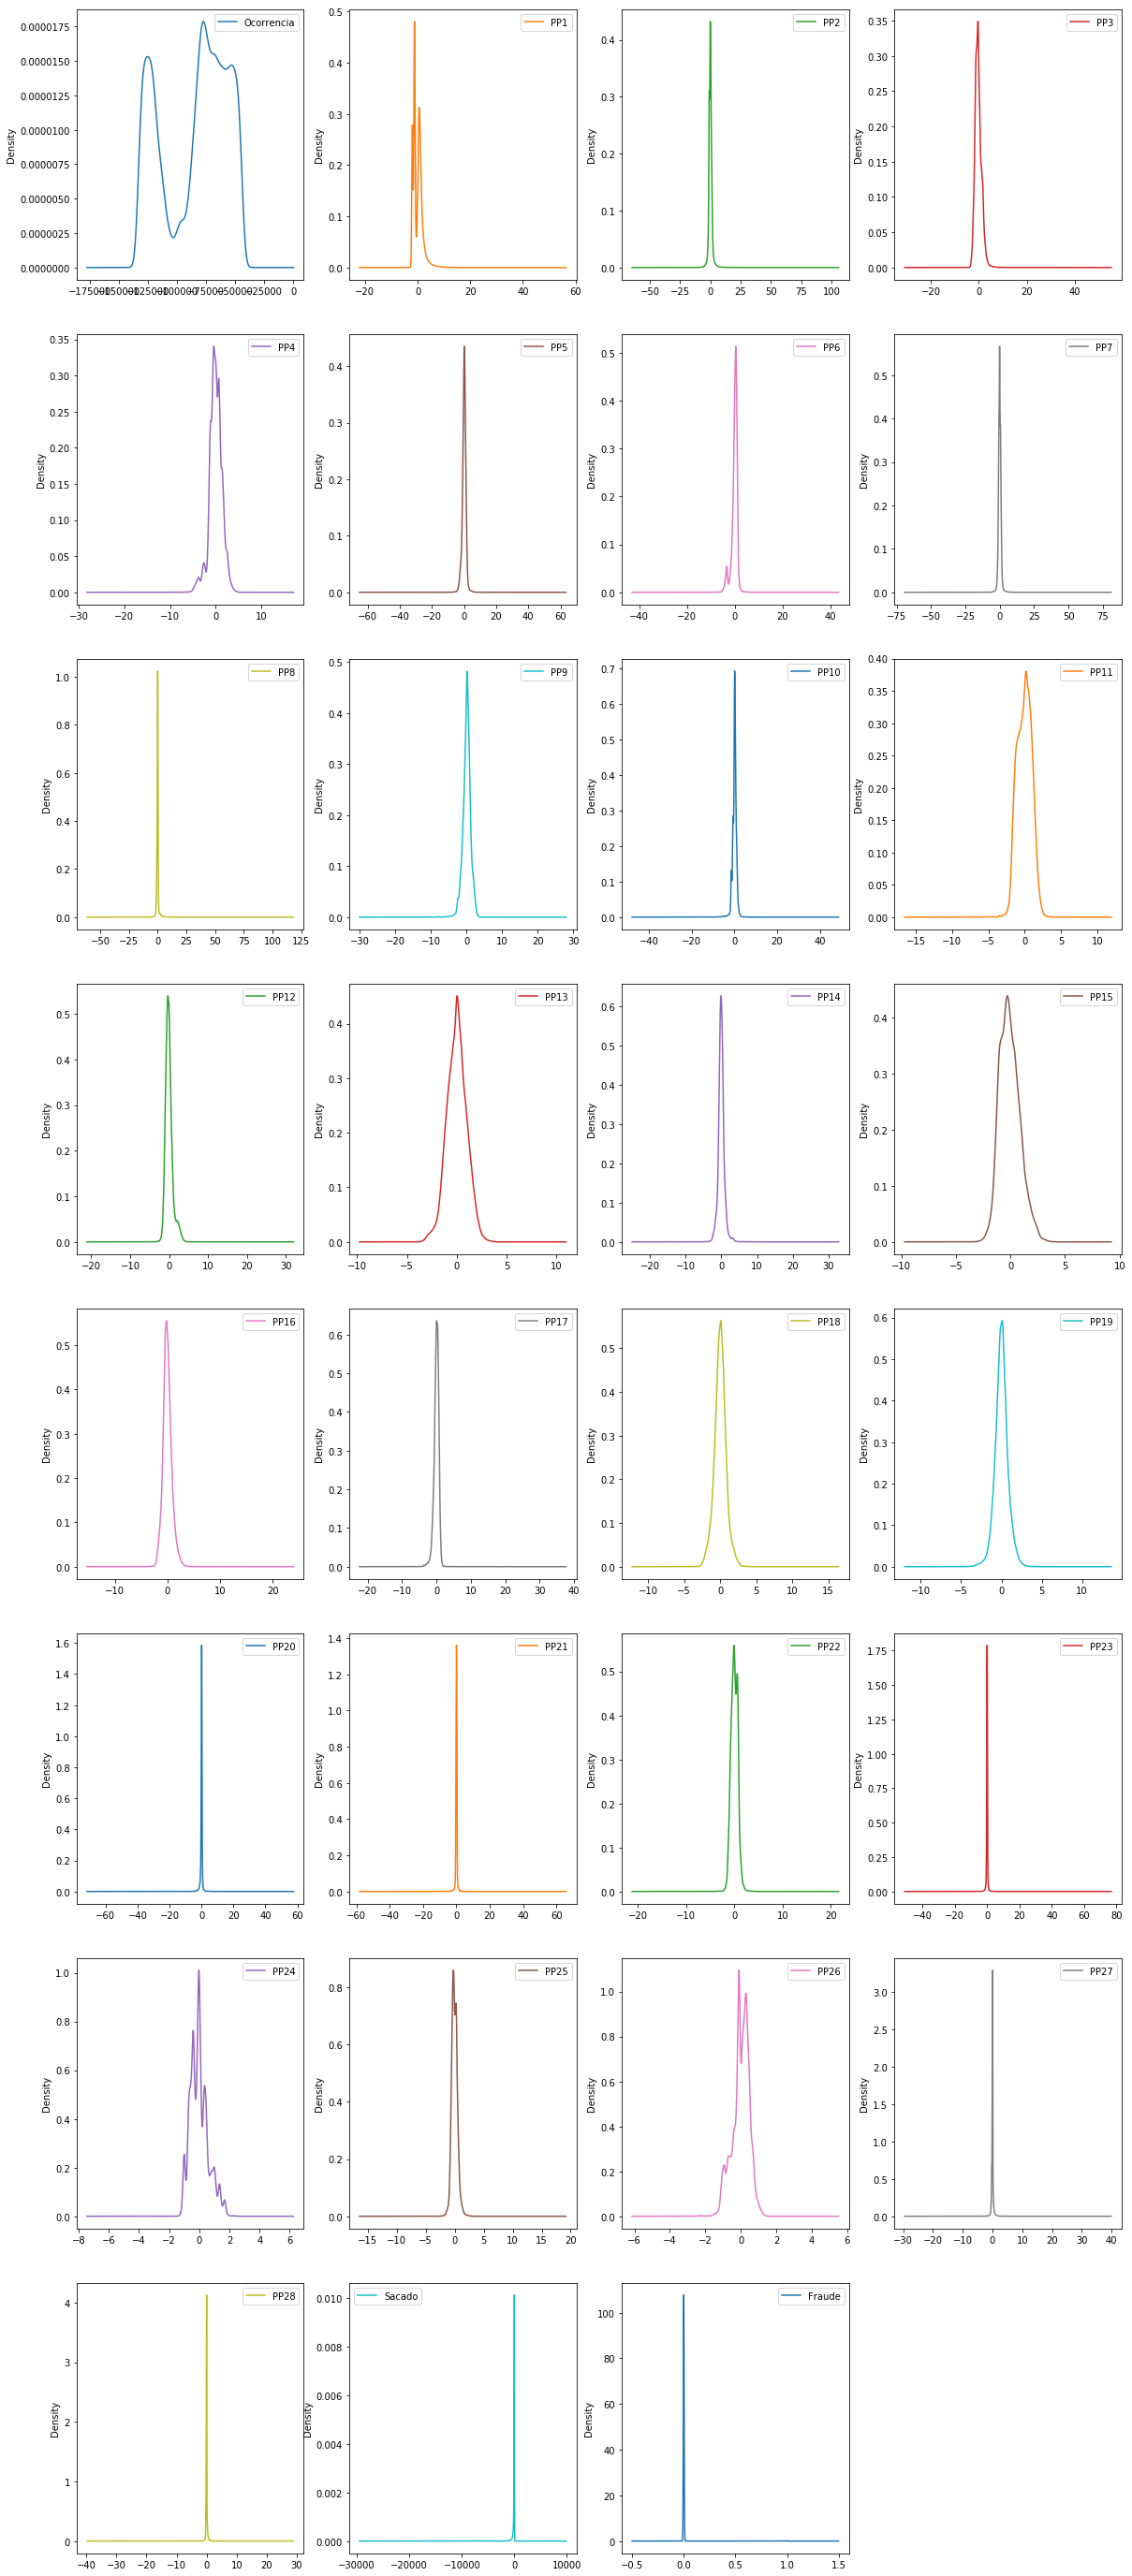

In [19]:
#Gráfico de Densidade
df.plot(kind = 'density', subplots = True, layout = (8,4), sharex = False, figsize=(20,50))
plt.show()

Comentário: Os dados estão em distribuição normal, como praticamente todas as colunas estão assim, acredito que os dados foram submetidos a técnica de padronização. Isso também prejudica a análise exploratória, o ideal seria ter os dados brutos e após as análises, aplicar as técnicas para criar o modelo de ML. 

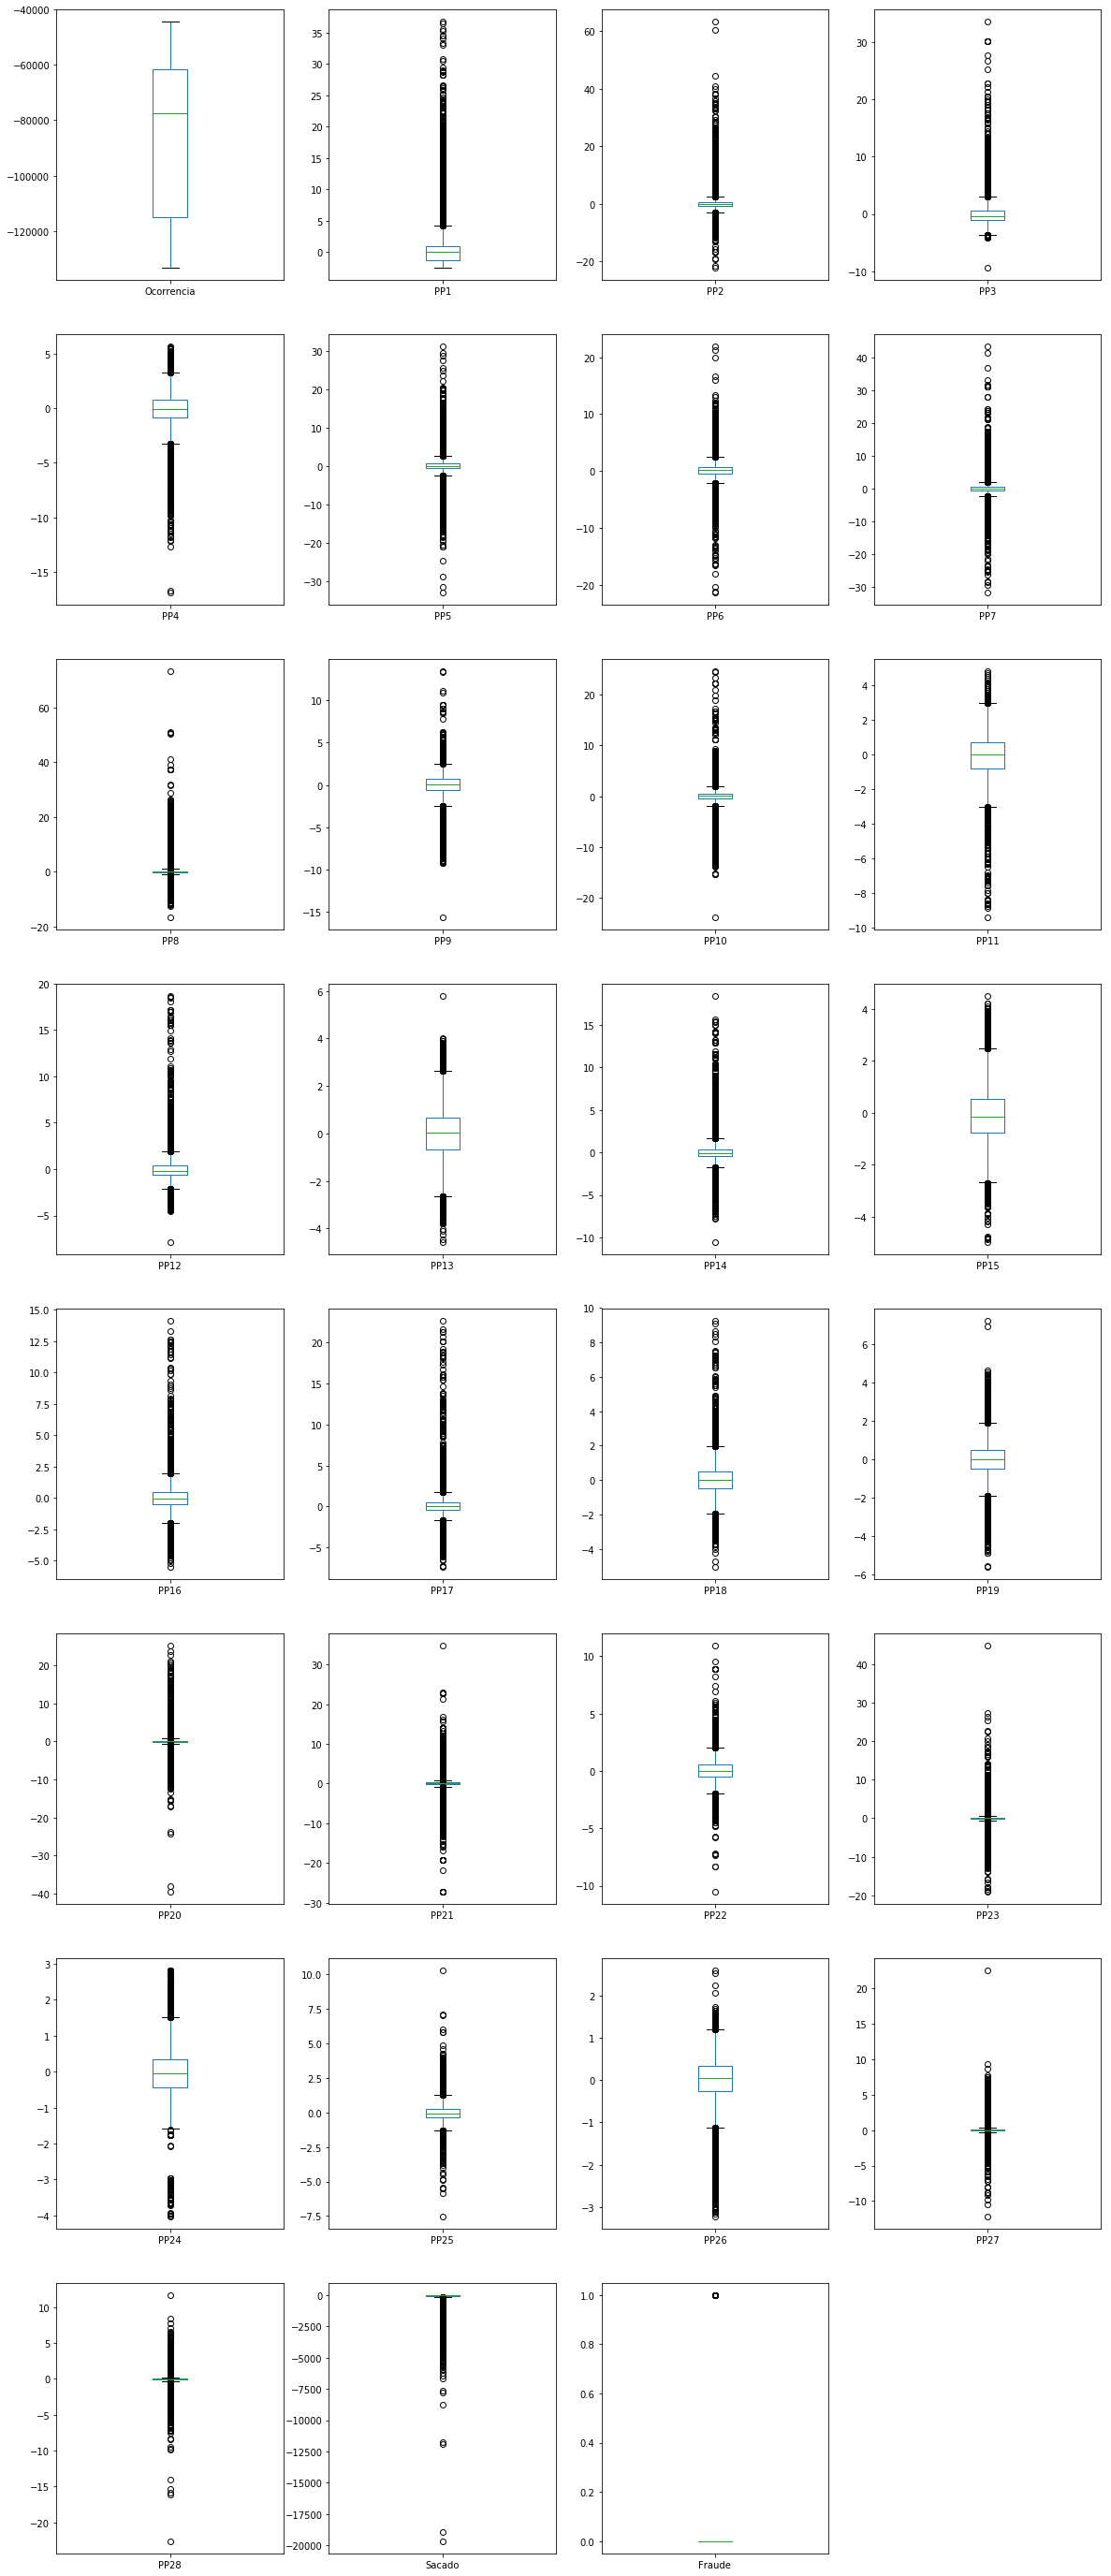

In [18]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (8,4), sharex = False, sharey = False, figsize=(20,50))
plt.show()

Comentário: Conforme imagens acima, tudo parece outliers, mas na verdade isso é causado pela normalização dos dados, mesmo assim, conseguimos visualizar algumas colunas com possíveis anomalias, são elas: PP2, PP4, PP8, PP13, PP19, PP20, PP21, PP23, PP25, PP27, PP28, Sacado

In [37]:
#Dados de Correlação entre as variáveis, multiplicado por 100 para melhorar a visualização. 
df.corr(method = 'pearson')*100

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
Ocorrencia,100.000000,13.067820,-2.572325,-40.544231,-8.026139,19.598616,-3.761042,8.558175,-5.744129,12.647566,...,5.664646,16.652607,4.202739,-2.187605,-21.550630,-6.234330,0.374262,-0.208598,-0.461526,0.254854
PP1,13.067820,100.000000,1.173272,-3.030647,0.802767,-2.613793,0.234826,1.247073,4.480802,0.437889,...,1.016753,-1.093254,-4.113476,-0.237412,4.181609,-1.111493,0.210341,5.928828,-23.145794,9.248126
PP2,-2.572325,1.173272,100.000000,1.667202,0.726745,-0.240376,1.914754,1.345375,-4.356064,0.113823,...,-2.246106,-0.122071,-0.704367,0.003097,-1.782152,-0.633893,-3.462527,3.905098,-54.914261,-8.368848
PP3,-40.544231,-3.030647,1.667202,100.000000,1.241917,-3.747855,-3.563867,0.991878,6.203969,-4.476653,...,1.423048,1.530278,-1.209861,0.607901,-1.404172,1.176296,1.894299,0.637131,-21.816828,17.689876
PP4,-8.026139,0.802767,0.726745,1.241917,100.000000,2.081759,-0.148190,0.256024,-1.334295,0.146879,...,0.523730,2.200356,1.277257,0.411375,-0.762939,-1.667290,-0.924048,-1.010220,9.043935,-11.336734
PP5,19.598616,-2.613793,-0.240376,-3.747855,2.081759,100.000000,2.249919,1.898054,2.078840,3.052313,...,-0.647679,-1.145190,0.365812,-0.427903,-0.374673,-2.037261,5.168961,-2.487260,-36.705345,9.002515
PP6,-3.761042,0.234826,1.914754,-3.563867,-0.148190,2.249919,100.000000,-3.260929,0.026700,0.237227,...,1.271251,1.292403,-0.226060,-1.413964,0.437165,0.387136,-2.036120,1.561270,19.689885,2.705548
PP7,8.558175,1.247073,1.345375,0.991878,0.256024,1.898054,-3.260929,100.000000,8.262808,2.383295,...,4.796492,-2.562452,0.913256,-0.116141,-1.622634,-1.326974,-1.436795,0.774663,36.954343,18.960769
PP8,-5.744129,4.480802,-4.356064,6.203969,-1.334295,2.078840,0.026700,8.262808,100.000000,0.702179,...,0.914486,0.826322,-1.433278,0.384491,0.772028,1.447366,1.260036,-0.390277,-9.498692,4.048326
PP9,12.647566,0.437889,0.113823,-4.476653,0.146879,3.052313,0.237227,2.383295,0.702179,100.000000,...,2.227166,3.119177,-0.508558,0.074397,0.239217,0.809328,1.396891,-1.826636,-3.626822,7.975801


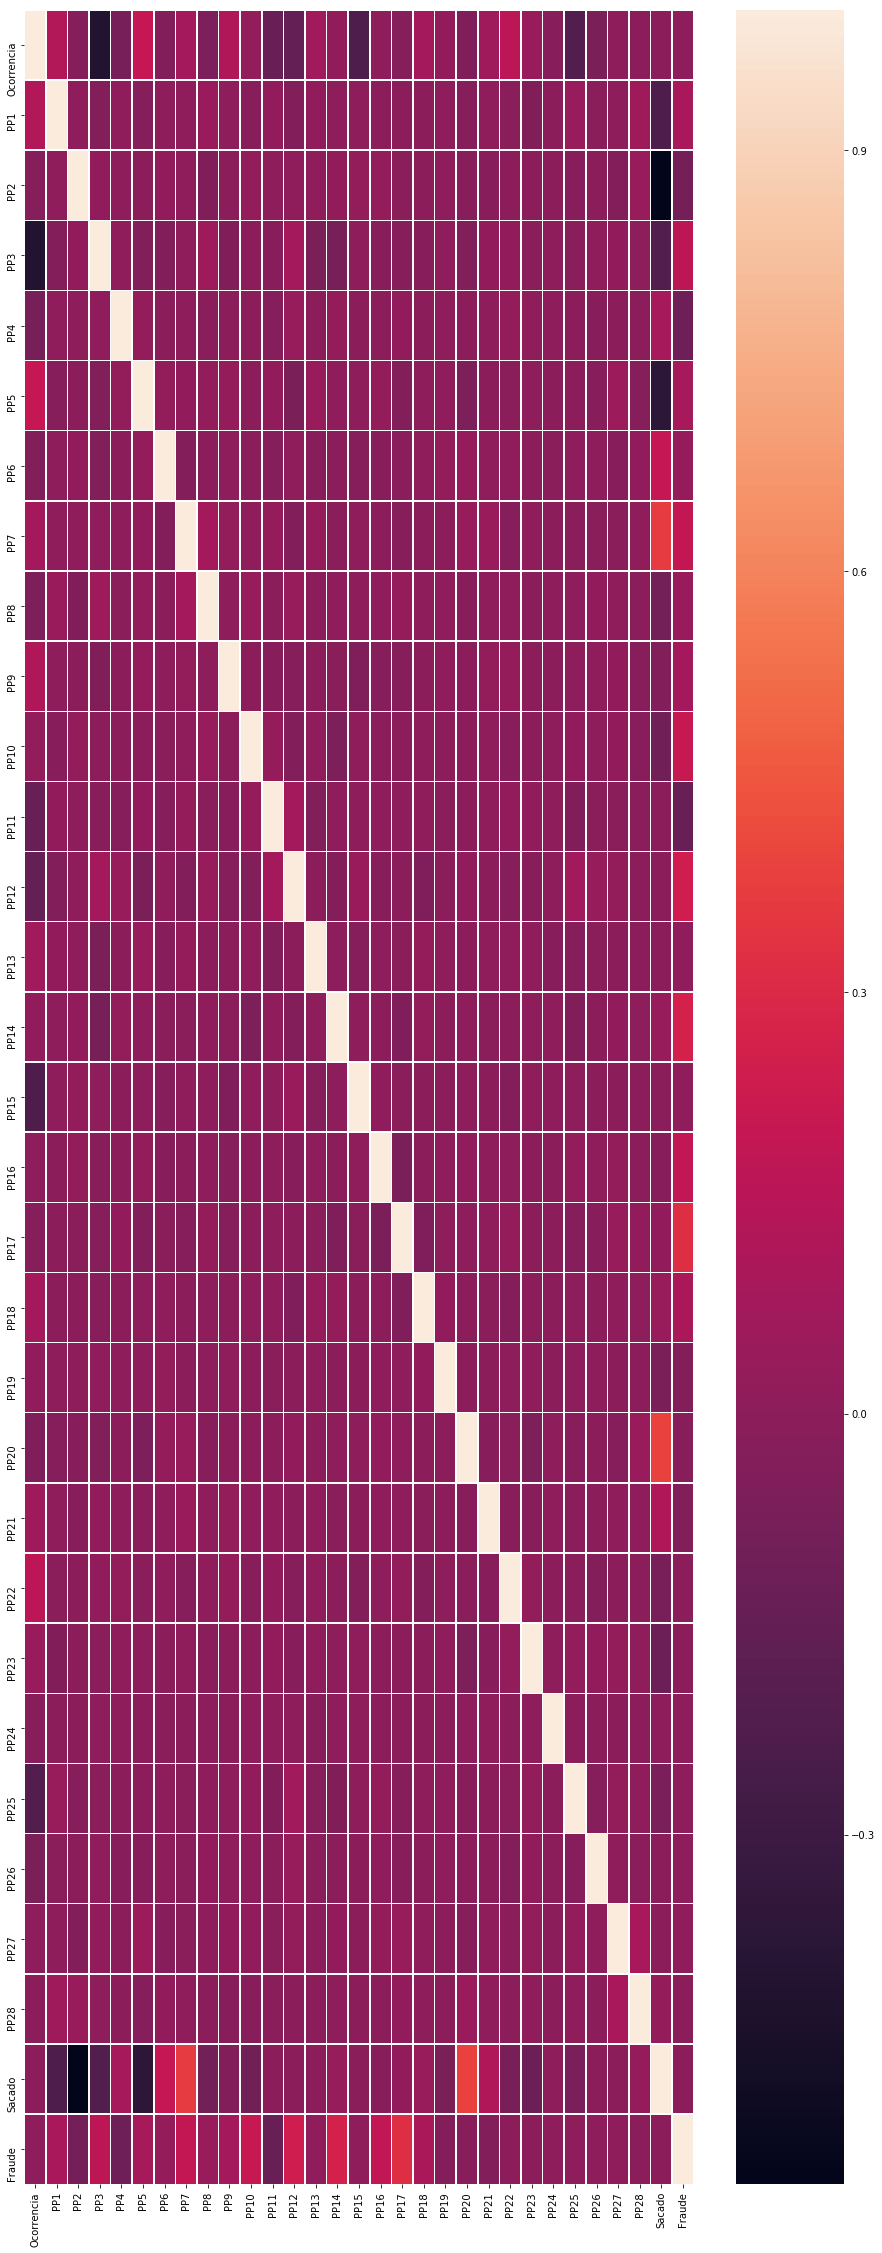

In [36]:
# Correlação em gráfico de HeatMap
f, ax = plt.subplots(figsize=(15, 40))
sns.heatmap(df.corr(method = 'pearson'),linewidths=.5, ax=ax)

In [31]:
# Correlação com a variável Target ordenado, feita a multiplicacao por 100 para melhor visualização
df.drop("Fraude", axis=1).apply(lambda x: x.corr(df.Fraude) * 100).sort_values()

PP11         -13.285001
PP4          -11.336734
PP2           -8.368848
PP21          -3.987550
PP19          -3.400318
PP20          -1.723442
PP28          -0.943733
Sacado        -0.751516
PP22          -0.742457
PP23          -0.615783
Ocorrencia     0.254854
PP26           0.313836
PP24           0.421241
PP25           0.584267
PP27           0.896319
PP13           1.088100
PP15           1.302661
PP6            2.705548
PP8            4.048326
PP9            7.975801
PP5            9.002515
PP1            9.248126
PP18          10.105426
PP3           17.689876
PP16          18.383480
PP7           18.960769
PP10          20.873338
PP12          23.865133
PP14          26.499645
PP17          31.661802
dtype: float64

Comentário: Feita a análise de correlação entre as colunas e a análise com a variável Target, as com maiores e menores valores serão utilizados no modelo de ML, as com valores próximos de 0 serão desconsiderados. Ainda iremos analisar a colinearidade para fecharmos a relação de variáveis. 


In [46]:
# Tratamento de identificação de colunas com alta colinearidade
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Achando os indexes das colunas com correlação maior que 0.90
resultado = [column for column in upper.columns if any(upper[column] > 0.90)]
resultado

[]

Comentário: Não foi identificado alta colinearidade entre as colunas, desta forma, iremos seguir selecionando as colunas pela correlação através da técnica de Feature selection com Random Forest.

# Problema da base desbalanceada 

Não Fraude: 149763
Fraude: 237
Proporção: 631.91 : 1


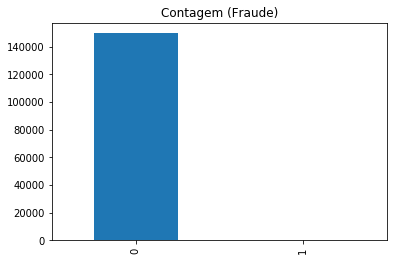

In [49]:
target_count = df.Fraude.value_counts()
print('Não Fraude:', target_count[0])
print('Fraude:', target_count[1])
print('Proporção:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Contagem (Fraude)',color = ['#1F77B4', '#FF7F0E']);

Comentário: Devido a base desbalanceada, iremos utilizar o SMOTE do pacte imblearn

In [126]:
#!pip install imblearn
import collections
from imblearn.over_sampling import SMOTE, ADASYN
y = df.Fraude
del df['Fraude']
data_o, target_o = SMOTE().fit_sample(df, y)


In [81]:
data_o.shape

(299526, 30)

In [82]:
target_o.shape

(299526,)

In [83]:
collections.Counter(target_o)

Counter({0: 149763, 1: 149763})

# Feature selection

In [127]:
seed = 1313

# Feature selection com Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(random_state=seed)
selector = clf.fit(data_o, target_o)
fs = SelectFromModel(selector, prefit=True)

data_o_new = fs.transform(data_o)


print(data_o_new.shape, target_o.shape)



(299526, 6) (299526,)


In [86]:
# Montando nova estrutura de dados com as colunas selecionadas
mask = fs.get_support()
colunas = df.columns
new_features = [] 
for bool, feature in zip(mask, colunas):
    if bool:
        new_features.append(feature)
        

df_selection = pd.DataFrame(data_o_new, columns=new_features)
df_selection['Fraude'] = target_o

df_selection.head(10)



,PP4,PP10,PP11,PP12,PP14,PP16,PP17,Fraude
0,0.251323,-0.521274,0.357440,-1.229859,1.034054,1.322059,0.203699,0
1,1.122846,1.176820,-1.005574,-1.315100,-0.038456,0.076187,0.434745,0
2,-0.428284,0.138069,0.340559,-0.600446,1.186472,-0.294058,-1.185046,0
3,-0.929524,-0.093204,-1.695905,-0.858794,-0.721720,0.324972,0.092153,0
4,0.374010,1.774507,1.130069,-0.529619,-0.539129,-1.296754,0.275466,0
5,-1.209587,0.144356,1.371141,0.337040,-0.121332,-0.041093,0.216084,0
6,-0.871200,-0.134853,-1.272085,-0.975338,-0.548332,-0.037385,0.530802,0
7,0.341794,-0.104135,0.261161,-0.787753,0.236741,1.002734,0.706106,0
8,1.429721,1.045694,-0.977857,-1.426133,-0.114068,0.541163,0.146142,0
9,1.592340,0.015361,-1.018212,-0.045338,-0.180483,0.890010,0.487856,0


Comentário: As melhores colunas são as mesmas com maior correlação positiva ou negativa demonstrado acima. 

# Dados de Treino e Teste

In [128]:
#Gerando dados de Treino e de Teste para os modelos, 70% para treinamento e 30% para Avaliação
array = df_selection.values
X = array[:,0:6]
Y = df_selection.Fraude.values

from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30, random_state = seed)


In [90]:
X_treino.shape , X_teste.shape , y_treino.shape , y_teste.shape

((209668, 6), (89858, 6), (209668,), (89858,))

# Escolhendo os modelos de Classificação

LR: 0.937401 (0.073535)
LDA: 0.901527 (0.080682)
NB: 0.926393 (0.050433)
KNN: 0.992081 (0.015867)
CART: 0.992535 (0.011235)


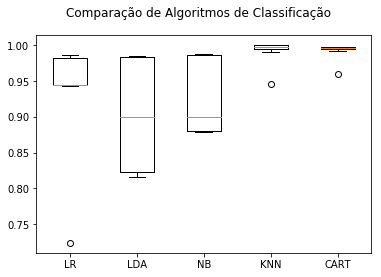

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))

# Definindo os valores para o número de folds
num_folds = 10

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Comentário: A acurácia de mais de 99% indica possível overfiting, irei utilizar os métodos Ensemble para evitá-lo. 

# Métodos com Ensemble

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo_gradiente = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado_gradiente = cross_val_score(modelo_gradiente, X, Y, cv = kfold)

# Print do resultado
print("Acurácia GradientBoosting: %.3f" % (resultado_gradiente.mean() * 100))

Acurácia: 97.919


In [101]:
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Criando o modelo
modelo_xgb = XGBClassifier()
# Treinando o modelo
modelo_xgb.fit(X_treino, y_treino)
# Pront do modelo
print(modelo_xgb)
# Fazendo previsões
y_pred_xgb = modelo_xgb.predict(X_teste)
y_pred_xgb_prob = modelo_xgb.predict_proba(X_teste)

previsoes_xgb = [round(value) for value in y_pred_xgb]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes_xgb)
print("Acurácia XGB: %.2f%%" % (accuracy * 100.0))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Acurácia XGB: 97.80%


Comentário: o Modelo XGBClassifier obteve a melhor acurária => 97.80%, decidi utilizá-lo e apresentá-lo como modelo final.   

## Confusion Matrix e Curva ROC do modelo XGBClassifier

[[44471   608]
 [ 1366 43413]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     45079
           1       0.99      0.97      0.98     44779

    accuracy                           0.98     89858
   macro avg       0.98      0.98      0.98     89858
weighted avg       0.98      0.98      0.98     89858



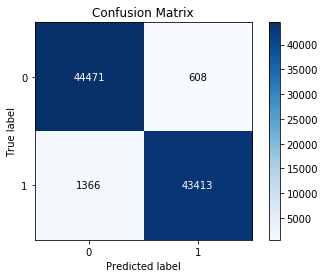

In [109]:
#!pip install scikit-plot
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

print(confusion_matrix(y_teste, previsoes_xgb))
print(classification_report(y_teste, previsoes_xgb))

skplt.metrics.plot_confusion_matrix(y_true=y_teste, y_pred=previsoes_xgb)
plt.show()


Comentário: Através da Matriz de Confusão conseguimos visualizar melhor que o modelo alcançou um resultado de 98% de acerto nas Fraudes apresentadas nesse dataset e que os 98% ficaram balanceados nas categorias de Não Fraude e Fraude. 

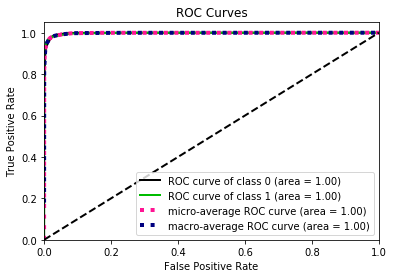

In [110]:
skplt.metrics.plot_roc(y_teste, y_pred_xgb_prob)
plt.show()

# Melhorando o modelo - HyperParametros


In [131]:
# Utilizando RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint

modelo_inicial = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold = KFold(num_folds, True, random_state = seed)

rsearch = RandomizedSearchCV(modelo_inicial, 
                         param_distributions = param_dist,
                         cv = kfold,  
                         n_iter = 2,
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 27.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 27.1min finished


Acurácia: 99.991
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.13447815907134084, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=522, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9651070749316022, verbosity=1)


# Gerando o modelo final com a otimização

In [141]:
# Criando o modelo
modelo_xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Treinando o modelo
modelo_xgb_final.fit(X_treino, y_treino)
# Fazendo previsões
y_pred_xgb = modelo_xgb.predict(X_teste)
previsoes_xgb = [round(value) for value in y_pred_xgb]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes_xgb)
print("Acurácia XGB Final: %.2f%%" % (accuracy * 100.0))

Acurácia XGB Final: 97.80%


Comentário: Mesmo com a otimização, a acurária foi a mesma, 97,80%

In [142]:
import pickle
# Salvando o modelo
arquivo = 'modelo_analiseFraude_final.sav'
pickle.dump(modelo_xgb_final, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


## FIM
## OBRIGADO